# Cyber Security Salaries
Сборник заработной платы для людей, работающих в сфере кибербезопасности.

## Описание столбцов
  
### `work_year`
год, когда была начислена зарплата
  
### `experience_level`
EN Entry-level / Junior   
MI Mid-level / Intermediate   
SE Senior-level / Expert   
EX Executive-level / Director  
  
### `employment_type`
PT неполный рабочий день   
FT полный рабочий день   
CT договор   
FL фриланс  
  
### `job_title`
название должности
  
### `salary`
заработная плата
  
### `salary_currency`
валюта, в которой платится зарабатная плата
  
### `salary_in_usd`
зарплата в долларах
  
### `employee_residence`
место жительства сотрудника
  
### `remote_ratio`
0 не удалённая работа (<20%)   
50 частично удаленно   
100 удаленная работа (>80%)  
  
### `company_location`
расположение компании
  
### `company_size`
размер компании

Импортируем библиотеки

In [75]:
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.io as pio

In [76]:
data = pd.read_csv('https://raw.githubusercontent.com/Belka258/DSIS_summer_hw/main/salaries_cyber.csv')

выведем информацию о колонках

In [77]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

выведем датасет

In [78]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M
2,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M
3,2022,MI,FT,IT Security Analyst,250000,BRL,48853,BR,50,BR,L
4,2022,EN,CT,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S
...,...,...,...,...,...,...,...,...,...,...,...
1242,2020,MI,FT,Cyber Security Analyst,140000,AUD,96422,AU,50,AU,M
1243,2021,SE,FT,Information Security Manager,60000,GBP,82528,GB,50,GB,L
1244,2021,SE,FT,Penetration Testing Engineer,126000,USD,126000,US,100,US,L
1245,2021,MI,FT,Information Security Analyst,42000,GBP,57769,GB,100,GB,L


выведем первые 3 строки

In [79]:
data.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M
2,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M


выведем размер датасета

In [80]:
data.shape

(1247, 11)

добавляем столбец company_location_alpha3 (он нам понадобится при построении карт)

In [82]:
import pycountry

def alpha2_to_alpha3(alpha2):
    try:
        country = pycountry.countries.get(alpha_2=alpha2)
        return country.alpha_3
    except AttributeError:
        return None

data['company_location_alpha3'] = data['company_location'].apply(alpha2_to_alpha3)

data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_location_alpha3
0,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S,USA
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M,USA
2,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M,USA
3,2022,MI,FT,IT Security Analyst,250000,BRL,48853,BR,50,BR,L,BRA
4,2022,EN,CT,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S,BWA
...,...,...,...,...,...,...,...,...,...,...,...,...
1242,2020,MI,FT,Cyber Security Analyst,140000,AUD,96422,AU,50,AU,M,AUS
1243,2021,SE,FT,Information Security Manager,60000,GBP,82528,GB,50,GB,L,GBR
1244,2021,SE,FT,Penetration Testing Engineer,126000,USD,126000,US,100,US,L,USA
1245,2021,MI,FT,Information Security Analyst,42000,GBP,57769,GB,100,GB,L,GBR


выведем список стран

In [83]:
data['company_location_alpha3'].unique()

array(['USA', 'BRA', 'BWA', 'GBR', 'SGP', 'NLD', 'IND', 'DEU', 'ARE',
       'CAN', 'CHE', 'DNK', 'CHL', 'ESP', 'AUS', 'FRA', 'ITA', 'JPN',
       'GRC', 'AZE', 'ROU', 'DZA', 'ATA', 'ALA', 'SVN', 'HRV', 'SWE',
       'HUN', 'ETH', 'MEX', 'ISR', 'IRL', 'PAK', 'NOR', 'POL', 'PRT',
       'RUS', 'CZE', 'IDN', 'EST', 'KEN', 'SRB', 'ARG', 'NZL', 'BEL',
       'ZAF', 'AUT', 'UMI', 'LUX', 'EGY', 'TWN', 'VNM', 'SAU', 'AFG',
       'TUR'], dtype=object)

добавим столбец salary_in_usd_2 (salary_in_usd*коэффициент по паритету покупательной способности)

In [84]:
coefficients = {
    'AFG': 5.44, 'ALA': 1.22, 'ARE': 1.63, 'ARG': 1.94, 'AUS': 0.97, 'AUT': 1.07, 'AZE': 2.3, 'BEL': 1.08, 'BRA': 2, 'BWA': 2.36,
    'CAN': 1.06, 'CHE': 0.91, 'CHL': 1.97, 'CZE': 1.86, 'DEU': 1.13, 'DNK': 0.88, 'DZA': 3.08, 'EGY': 3.5, 'ESP': 1.35, 'EST': 1.63,
    'ETH': 2.22, 'FRA': 1.1, 'GBR': 1, 'GRC': 1.48, 'HRV': 2.23, 'HUN': 2.27, 'IDN': 3.06, 'IND': 3.51, 'IRL': 1.07, 'ISR': 0.9,
    'ITA': 1.2, 'JPN': 1.35, 'KEN': 2.74, 'LUX': 0.97, 'MEX': 1.94, 'NLD': 1.12, 'NOR': 1.08, 'NZL': 1.08, 'PAK': 4.03, 'POL': 2.22,
    'PRT': 1.45, 'ROU': 2.39, 'RUS': 3.25, 'SAU': 1.94, 'SGP': 1.54, 'SRB': 2.57, 'SWE': 0.97, 'TUR': 3.51, 'TWN': 0.47, 'UMI': 1,
    'USA': 1, 'VNM': 3.23, 'ZAF': 2.35
}


data['salary_in_usd_2'] = data['salary_in_usd'] * data['company_location_alpha3'].map(coefficients)
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_location_alpha3,salary_in_usd_2
0,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S,USA,63000.00
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M,USA,95000.00
2,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M,USA,70000.00
3,2022,MI,FT,IT Security Analyst,250000,BRL,48853,BR,50,BR,L,BRA,97706.00
4,2022,EN,CT,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S,BWA,283200.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,2020,MI,FT,Cyber Security Analyst,140000,AUD,96422,AU,50,AU,M,AUS,93529.34
1243,2021,SE,FT,Information Security Manager,60000,GBP,82528,GB,50,GB,L,GBR,82528.00
1244,2021,SE,FT,Penetration Testing Engineer,126000,USD,126000,US,100,US,L,USA,126000.00
1245,2021,MI,FT,Information Security Analyst,42000,GBP,57769,GB,100,GB,L,GBR,57769.00


выведем строку с максимальной з/п

In [85]:
maximum = data[data['salary_in_usd_2'] == data['salary_in_usd_2'].max()]
maximum

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_location_alpha3,salary_in_usd_2
417,2022,MI,FT,Cyber Security Engineer,410000,USD,410000,IN,100,IN,L,IND,1439100.0


выведем строки с минимальной з/п

In [86]:
minimum = data[data['salary_in_usd_2'] == data['salary_in_usd_2'].min()]
minimum

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_location_alpha3,salary_in_usd_2
1122,2021,MI,FT,Penetration Tester,1740,EUR,2056,PT,100,PT,M,PRT,2981.2


найдём медианную з/п для джуниоров, мидлов, сеньеров и директоров

In [87]:
data_en = data[data['experience_level']=='EN']
ave_en = data_en['salary_in_usd_2'].median()

data_mi = data[data['experience_level']=='MI']
ave_mi = data_mi['salary_in_usd_2'].median()

data_se = data[data['experience_level']=='SE']
ave_se = data_se['salary_in_usd_2'].median()

data_ex = data[data['experience_level']=='EX']
ave_ex = data_ex['salary_in_usd_2'].median()


построим столбчатую диаграмму, отражающую медианную з/п специалистов различного уровня

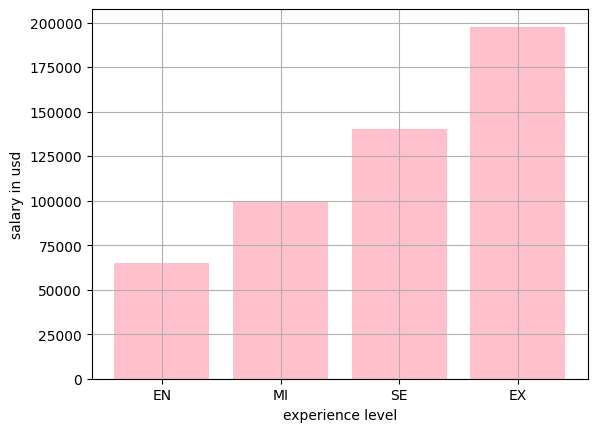

In [88]:
median_data = pd.DataFrame([ave_en, ave_mi, ave_se, ave_ex], index = ['EN', 'MI', 'SE', 'EX'],
                           columns = ['ave_salary'])
x = ['EN', 'MI', 'SE', 'EX']
y = list(median_data.iloc[:,0])
plt.bar(x, y, color = 'pink')
plt.xlabel('experience level')
plt.ylabel('salary in usd')
plt.grid()
plt.show()

In [89]:
data.insert(11, "one", [1 for n in range(1247)], True)

построим столбчатую диаграму, показывающую количество работников по типу занятости

In [90]:
fig = px.histogram(data,
                   x="experience_level",
                   category_orders = dict(experience_level = ['EN', 'MI', 'SE', 'EX']),
                   y='one',
                   color="employment_type",
                   text_auto = True
                  )
fig.update_yaxes(title_text="count")
fig.show()

построим столбчатую диаграму, показывающую количество работников по типу занятости

In [91]:
fig = px.histogram(data,
                   x="experience_level",
                   y='one',
                   color="remote_ratio",
                   text_auto = True
                  )
fig.update_yaxes(title_text="count")
fig.show()

выведем название всех профессий

In [92]:
data['job_title'].unique()

array(['Cyber Program Manager', 'Security Analyst', 'IT Security Analyst',
       'Cyber Security Analyst', 'Application Security Architect',
       'Security Researcher', 'Information Security Compliance Analyst',
       'Information Security Compliance Manager', 'Security Specialist',
       'Application Security Specialist', 'Cyber Security Consultant',
       'Head of Information Security',
       'Security Incident Response Engineer', 'Ethical Hacker',
       'Chief Information Security Officer', 'DevSecOps Engineer',
       'IT Security Manager', 'Application Security Engineer',
       'Vulnerability Analyst', 'Cyber Security Engineer',
       'Information Security Analyst',
       'Principal Application Security Engineer',
       'Cyber Security Architect', 'Information Security Manager',
       'SOC Analyst', 'Penetration Tester',
       'Cyber Threat Intelligence Analyst', 'Cloud Security Engineer',
       'Information Security Officer', 'Security Consultant',
       'Informat

In [93]:
vals_job_title_nr = data.groupby('job_title').count()['one']

построим круговую диограмму, отражающую количество человек каждой профессии

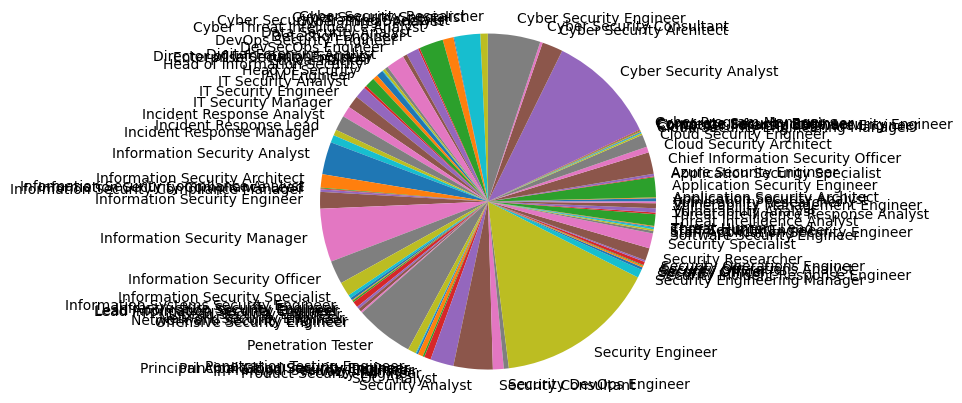

In [94]:
fig, ax = plt.subplots()
ax.pie(vals_job_title_nr, labels = vals_job_title_nr.keys())
ax.axis('equal')

plt.show()

заменим схожие профессии

In [95]:
data['job_title'].replace(
    {'Cyber Program Manager':"Manager",  'Information Security Compliance Manager':"Manager",
     'IT Security Manager':"Manager", 'Information Security Manager':"Manager",
     'Security Engineering Manager':"Manager", 'Privacy Manager':"Manager",
     'Privacy Manager':"Manager",

     'Security Analyst':"Analyst", 'IT Security Analyst':"Analyst",
     'Cyber Security Analyst':"Analyst", 'Information Security Compliance Analyst':"Analyst",
     'Vulnerability Analyst':"Analyst", 'Information Security Analyst':"Analyst",

     'Application Security Engineer':"Application Security", 'Principal Application Security Engineer':"Application Security",
     'Staff Application Security Engineer':"Application Security", 'Lead Application Security Engineer':"Application Security",
     'Application Security Specialist':"Application Security", 'Application Security Analyst':"Application Security",
     'Application Security Architect':"Application Security",

     'Security Incident Response Engineer':"Incident Response", 'SOC Analyst':"Incident Response",
     'Cyber Threat Intelligence Analyst':"Incident Response", 'Threat Intelligence Analyst':"Incident Response",
     'Security Operations Analyst':"Incident Response", 'Incident Response Analyst':"Incident Response",
     'Incident Response Manager':"Incident Response", 'Digital Forensics Analyst':"Incident Response",
     'Incident Response Lead':"Incident Response", 'Threat Intelligence Response Analyst':"Incident Response",
     'Cyber Threat Analyst':"Incident Response",

     'DevSecOps Engineer':"DevSecOps and cloud", 'Cloud Security Engineer':"DevSecOps and cloud",
     'Cloud Security Engineering Manager':"DevSecOps and cloud", 'Azure Security Engineer':"DevSecOps and cloud",
     'DevOps Security Engineer':"DevSecOps and cloud", 'Security DevOps Engineer':"DevSecOps and cloud",
     'Cloud Security Architect':"DevSecOps and cloud", 'Principal Cloud Security Engineer':"DevSecOps and cloud",
     'Network Security Engineer':"DevSecOps and cloud", 'Network and Security Engineer':"DevSecOps and cloud",

     'Penetration Tester':"Pentest", 'Penetration Testing Engineer':"Pentest",
     'Ethical Hacker':"Pentest", 'Threat Hunter':"Pentest",
     'Vulnerability Researcher':"Pentest", 'Offensive Security Engineer':"Pentest",
     'Threat Hunting Lead':"Pentest", 'Cyber Security Researcher':"Pentest",
     'Security Researcher':"Pentest",

     'Cyber Security Engineer':"Engineer", 'Security Engineer':"Engineer",
     'Security Engineer':"Engineer", 'IT Security Engineer':"Engineer",
     'Detection Engineer':"Engineer", 'Principal Security Engineer':"Engineer",
     'Information Systems Security Engineer':"Engineer", 'Concierge Security Engineer':"Engineer",
     'Information Security Engineer':"Engineer", 'Vulnerability Management Engineer':"Engineer",
     'Security Operations Engineer':"Engineer", 'Product Security Engineer':"Engineer",
     'Computer Forensic Software Engineer':"Engineer", 'Lead Security Engineer':"Engineer",
     'Infrastructure Security Engineer':"Engineer", 'Corporate Security Engineer':"Engineer", 'Staff Security Engineer':"Engineer",
     'Enterprise Security Engineer':"Engineer", 'Software Security Engineer':"Engineer",
     'IAM Engineer':"Engineer", 'Lead Information Security Engineer':"Engineer",
     'Corporate Infrastructure Security Engineer':"Engineer",


     'Security Specialist':"Other", 'Cyber Security Consultant':"Other",
     'Head of Information Security':"Other", 'Chief Information Security Officer':"Other",
     'Information Security Officer':"Other", 'Security Consultant':"Other",
     'Information Security Specialist':"Other", 'Director of Information Security':"Other",
     'Security Officer':"Other", 'Cyber Security Specialist':"Other",
     'Head of Security':"Other", 'Security Officer 3':"Other",
     'Cyber Security Architect':"Other", 'Information Security Architect':"Other",
     'Information Security Compliance Lead':"Other", 'Data Security Analyst':"Other",
     'Cyber Security Training Specialist':"Other"

    },inplace=True)


In [96]:
data['job_title'].unique()

array(['Manager', 'Analyst', 'Application Security', 'Pentest', 'Other',
       'Incident Response', 'DevSecOps and cloud', 'Engineer'],
      dtype=object)

In [97]:
vals_job_title = data.groupby('job_title').count()['one']

построим круговую диаграмму, отражающую количество человек каждой профессии после группировки

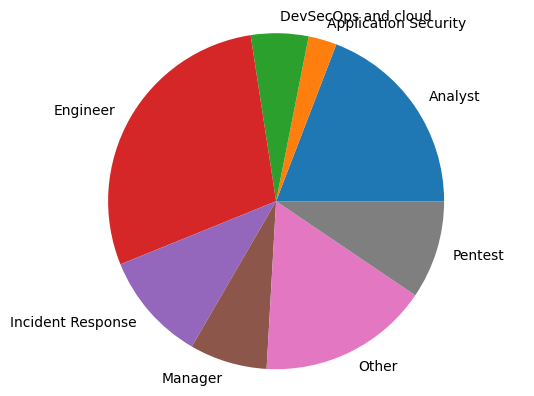

In [98]:
fig, ax = plt.subplots()
ax.pie(vals_job_title, labels = vals_job_title.keys())
ax.axis('equal')

plt.show()

построим столбчатую диаграмму с медианной з/п для каждой профессии

<ipython-input-99-64db8e6c3915>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



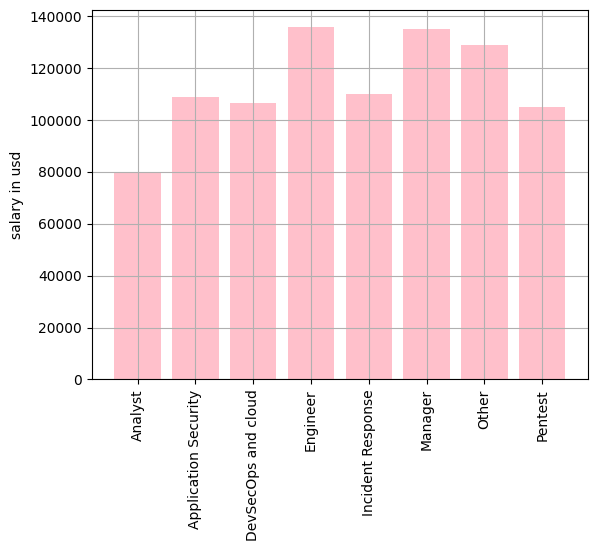

In [99]:
vals_job_salary = data.groupby('job_title').median()['salary_in_usd_2']

plt.bar(x = vals_job_salary.keys(), height = vals_job_salary, color = 'pink')
plt.xticks(vals_job_salary.keys(), rotation='vertical')
plt.ylabel('salary in usd')
plt.grid()
plt.show()

In [100]:
vals_job_salary_en = data[data['experience_level']=='EN'].groupby('job_title').median()['salary_in_usd_2']
vals_job_salary_mi = data[data['experience_level']=='MI'].groupby('job_title').median()['salary_in_usd_2']
vals_job_salary_se = data[data['experience_level']=='SE'].groupby('job_title').median()['salary_in_usd_2']
vals_job_salary_ex = data[data['experience_level']=='EX'].groupby('job_title').median()['salary_in_usd_2']
print(vals_job_salary_ex)

job_title
Application Security    287000.0
DevSecOps and cloud      98500.0
Engineer                210000.0
Incident Response       201000.0
Manager                 171140.5
Other                   200000.0
Pentest                 165509.2
Name: salary_in_usd_2, dtype: float64


<ipython-input-100-84f21c16f883>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-100-84f21c16f883>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-100-84f21c16f883>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-100-84f21c16f883>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will de

построим столбчатую диаграмму с медианной з/п джуниор специалистов для каждой профессии

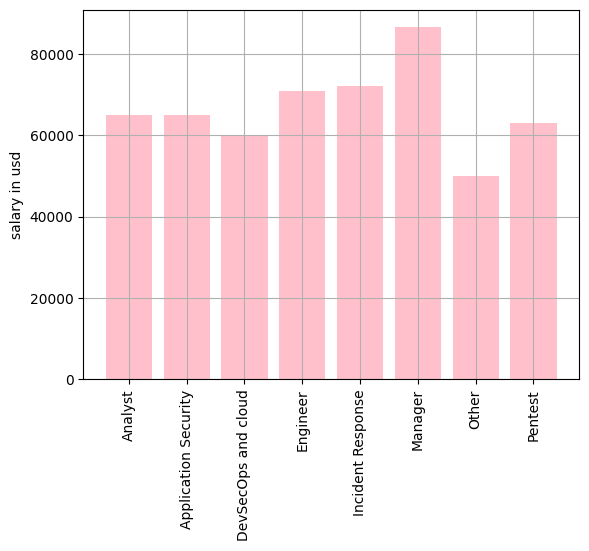

In [101]:
plt.bar(x = vals_job_salary_en.keys(), height = vals_job_salary_en, color = 'pink')
plt.xticks(vals_job_salary_en.keys(), rotation='vertical')
plt.ylabel('salary in usd')
plt.grid()
plt.show()

построим столбчатую диаграмму с медианной з/п мидл специалистов для каждой профессии

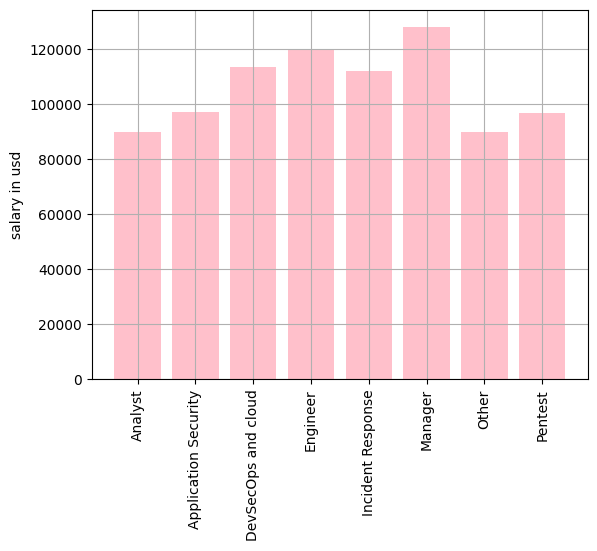

In [102]:
plt.bar(x = vals_job_salary_mi.keys(), height = vals_job_salary_mi, color = 'pink')
plt.xticks(vals_job_salary_mi.keys(), rotation='vertical')
plt.ylabel('salary in usd')
plt.grid()
plt.show()

построим столбчатую диаграмму с медианной з/п синьор специалистов для каждой профессии

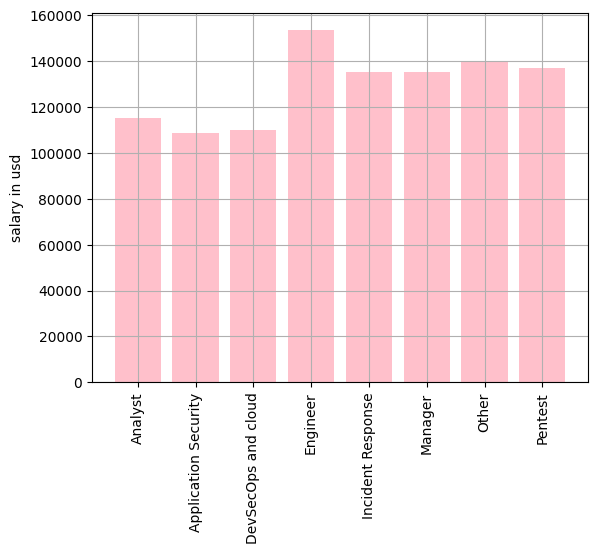

In [103]:
plt.bar(x = vals_job_salary_se.keys(), height = vals_job_salary_se, color = 'pink')
plt.xticks(vals_job_salary_se.keys(), rotation='vertical')
plt.ylabel('salary in usd')
plt.grid()
plt.show()

построим столбчатую диаграмму с медианной з/п руководителей для каждой профессии

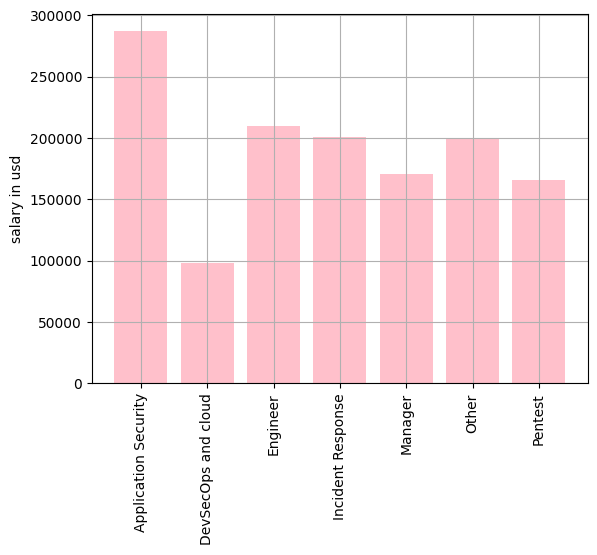

In [104]:
plt.bar(x = vals_job_salary_ex.keys(), height = vals_job_salary_ex, color = 'pink')
plt.xticks(vals_job_salary_ex.keys(), rotation='vertical')
plt.ylabel('salary in usd')
plt.grid()
plt.show()

дбавим столбец с медианной заработной платой для каждой страны с учётом experience_level

In [105]:
data['median_salary_in_usd_2'] = data.groupby(['company_location_alpha3', 'experience_level'])['salary_in_usd_2'].transform('median')

карта с уровнем зарплат для джуниор специалистов

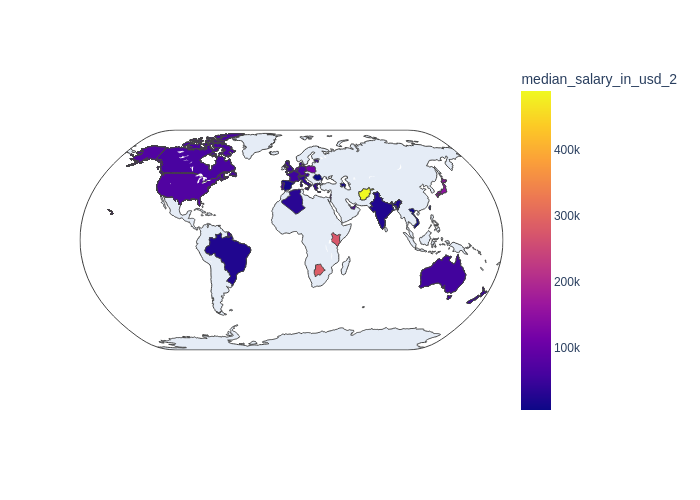

In [113]:
import plotly.express as px

fig = px.choropleth(data[data['experience_level']=='EN'], locations="company_location_alpha3",
                    color="median_salary_in_usd_2",
                    hover_name="company_location_alpha3",
                    projection='natural earth',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

from IPython.display import Image
pio.write_image(fig, 'choropleth_1.png')
Image(filename = 'choropleth_1.png')

карта с уровнем зарплат для мидл специалистов

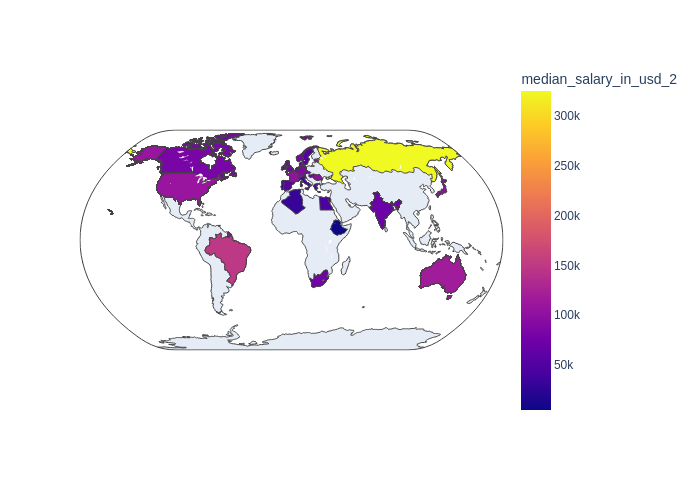

In [111]:
fig = px.choropleth(data[data['experience_level']=='MI'], locations="company_location_alpha3",
                    color="median_salary_in_usd_2",
                    hover_name="company_location_alpha3",
                    projection='natural earth',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()
pio.write_image(fig, 'choropleth_2.png')
Image(filename = 'choropleth_2.png')

карта с уровнем зарплат для синьор специалистов

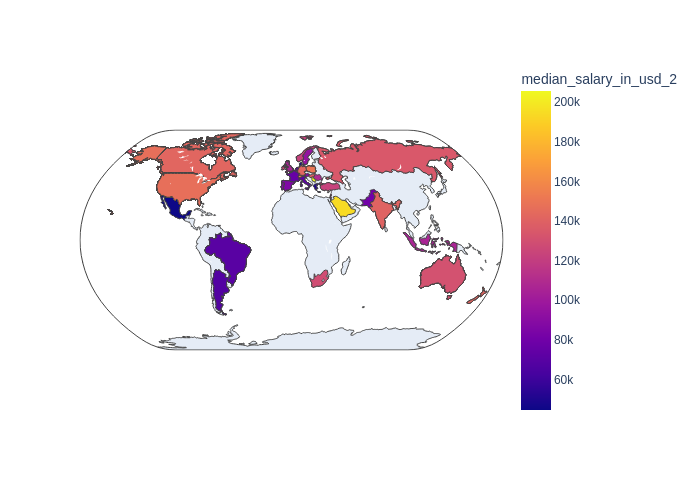

In [114]:
fig = px.choropleth(data[data['experience_level']=='SE'], locations="company_location_alpha3",
                    color="median_salary_in_usd_2",
                    hover_name="company_location_alpha3",
                    projection='natural earth',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()
pio.write_image(fig, 'choropleth_3.png')
Image(filename = 'choropleth_3.png')

карта с уровнем зарплат для руководителей

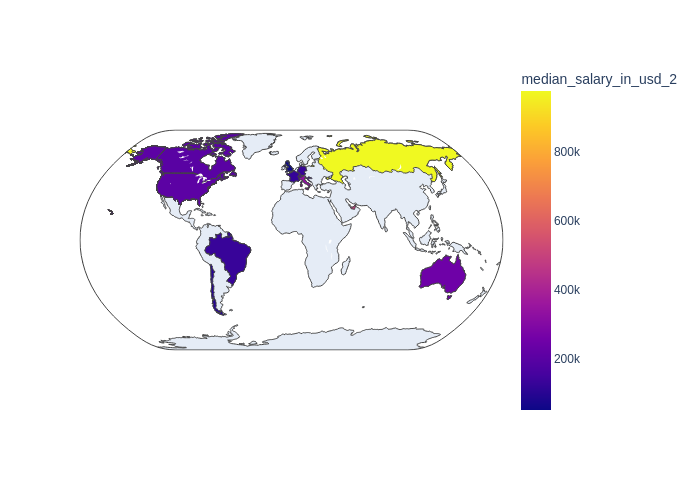

In [115]:
fig = px.choropleth(data[data['experience_level']=='EX'], locations="company_location_alpha3",
                    color="median_salary_in_usd_2",
                    hover_name="company_location_alpha3",
                    projection='natural earth',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()
pio.write_image(fig, 'choropleth_4.png')
Image(filename = 'choropleth_4.png')